In [3]:
#importing some of the libraries initially

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import sklearn

In [4]:
df = pd.read_csv('/content/BTC-USD-v2.csv') #constructing the dataframe

# **DATA ANALYSIS**

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2306 non-null   object 
 1   Open       2306 non-null   float64
 2   High       2306 non-null   float64
 3   Low        2306 non-null   float64
 4   Close      2306 non-null   float64
 5   Adj Close  2306 non-null   float64
 6   Volume     2306 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 126.2+ KB


In [7]:
len(df)

2306

In [8]:
df.isnull().values.sum() #checking whether there is any null value or not

0

In [9]:
StartDate = df.iloc[0][0]
EndDate = df.iloc[-1][0]
print("Start Date: " + StartDate)
print("End Date: " + EndDate)

Start Date: 2014-09-17
End Date: 2021-01-08


In [10]:
analysis_df = pd.read_csv('/content/BTC-USD-v2.csv', index_col = 'Date', parse_dates=True)

In [11]:
analysis_df.drop(analysis_df[['Adj Close', 'Volume']], axis=1)

,Open,High,Low,Close
Date,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015
2014-09-18,456.859985,456.859985,413.104004,424.440002
2014-09-19,424.102997,427.834991,384.532013,394.795990
2014-09-20,394.673004,423.295990,389.882996,408.903992
2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688
2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281


<Axes: xlabel='Date'>

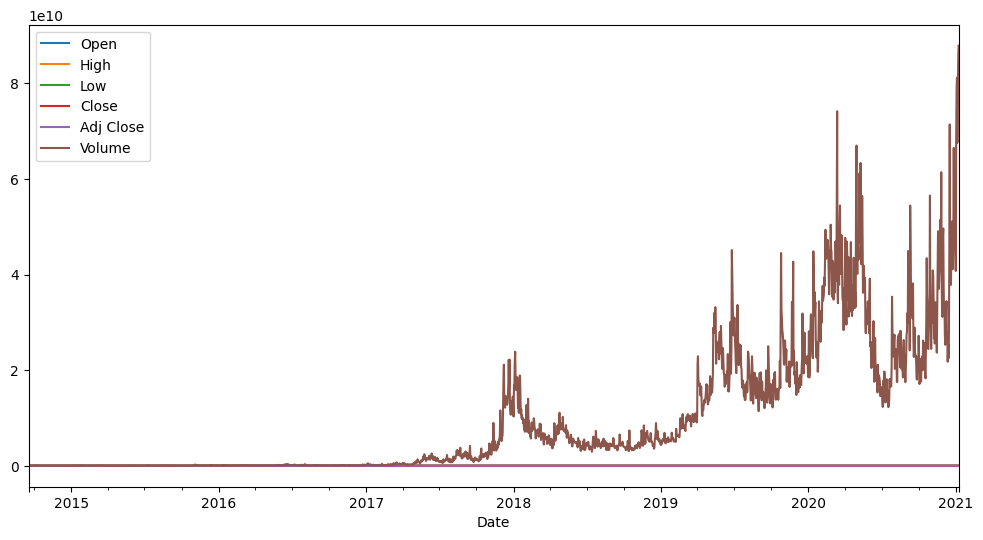

In [13]:
analysis_df.plot(figsize=(12,6))

In [14]:
train_df = df[['Date','Close']]

<Axes: xlabel='Date'>

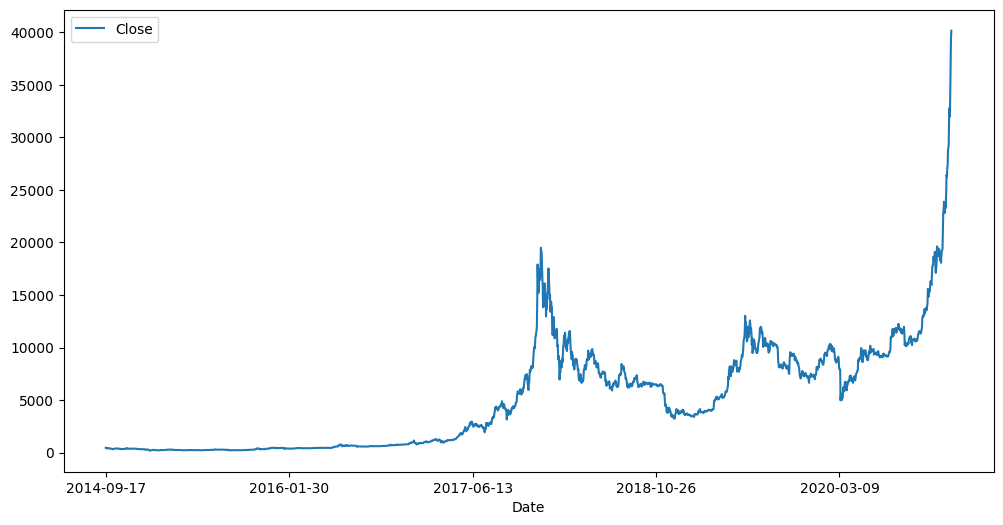

In [15]:
train_df.plot(x='Date',figsize=(12,6))

In [16]:
#In order to make a healthy prediction and avoid high fluctuations in the data, we will work with 1 year of period.

train_df = train_df[train_df['Date'] > '2020-01-08']
print(train_df.shape[0])

366


In [17]:
train_df.head()

,Date,Close
1940,2020-01-09,7879.071289
1941,2020-01-10,8166.554199
1942,2020-01-11,8037.537598
1943,2020-01-12,8192.494141
1944,2020-01-13,8144.194336


In [19]:
from sklearn.preprocessing import MinMaxScaler

train_df.drop('Date', axis=1, inplace=True)
scaler= MinMaxScaler(feature_range=(0,1))
train_df = scaler.fit_transform(np.array(train_df).reshape(-1,1))
print(train_df.shape)

(366, 1)


<ipython-input-19-8569afa9da74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop('Date', axis=1, inplace=True)


# **TRAINING**

In [20]:
size_training = int(len(train_df)*0.60)
size_test = len(train_df)-size_training
train_data, test_data = train_df[0: size_training,:], train_df[size_training: len(train_df), :1]
print(len(train_data))
print(len(test_data))

219
147


In [22]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a= dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY)

In [25]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(203, 15)
(203,)
(131, 15)
(131,)


In [28]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape)
print(X_test.shape)

(203, 15, 1)
(131, 15, 1)


In [67]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()

model.add(LSTM(10,input_shape=(None,1), activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32,verbose=1)

Epoch 1/150
7/7 [==============================] - 2s 67ms/step - loss: 0.0113 - val_loss: 0.1114
Epoch 2/150
7/7 [==============================] - 0s 35ms/step - loss: 0.0088 - val_loss: 0.1021
Epoch 3/150
7/7 [==============================] - 0s 38ms/step - loss: 0.0064 - val_loss: 0.0925
Epoch 4/150
7/7 [==============================] - 0s 34ms/step - loss: 0.0041 - val_loss: 0.0826
Epoch 5/150
7/7 [==============================] - 0s 35ms/step - loss: 0.0024 - val_loss: 0.0725
Epoch 6/150
7/7 [==============================] - 0s 40ms/step - loss: 0.0014 - val_loss: 0.0642
Epoch 7/150
7/7 [==============================] - 0s 32ms/step - loss: 0.0012 - val_loss: 0.0588
Epoch 8/150
7/7 [==============================] - 0s 37ms/step - loss: 0.0011 - val_loss: 0.0564
Epoch 9/150
7/7 [==============================] - 0s 36ms/step - loss: 0.0011 - val_loss: 0.0545
Epoch 10/150
7/7 [==============================] - 0s 34ms/step - loss: 9.8271e-04 - val_loss: 0.0527
Epoch 11/150
7/

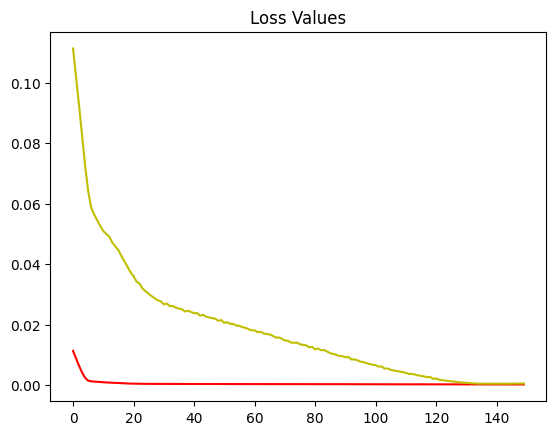

In [68]:
#Comparing loss and validation loss values

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs,loss, 'r', label= "Training Loss")
plt.plot(epochs, val_loss, 'y', label= "Validation Loss")
plt.title('Loss Values')

plt.show()

In [69]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 4ms/step


((203, 1), (131, 1))

In [70]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest= scaler.inverse_transform(y_test.reshape(-1,1))

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#TRAINING

print("Train Data RMSE: ",math.sqrt(mean_squared_error(original_ytrain, train_predict)))
print("Train Data MSE: ", mean_squared_error(original_ytrain, train_predict))
print("Train Data MAE: ", mean_absolute_error(original_ytrain, train_predict))

#TEST

print("Test Data RMSE: ",math.sqrt(mean_squared_error(original_ytest, test_predict)))
print("Test Data MSE: " ,mean_squared_error(original_ytest, test_predict))
print("Test Data MAE: " ,mean_absolute_error(original_ytest, test_predict))



Train Data RMSE:  469.23591066890094
Train Data MSE:  220182.33986127278
Train Data MAE:  307.4187889742919
Test Data RMSE:  765.10258004792
Test Data MSE:  585381.9579959839
Test Data MAE:  538.2665493196566


In [60]:
from keras.models import Sequential
from keras.layers import Dense, GRU

model = Sequential()
model.add(GRU(10, input_shape=(None, 1), activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32, verbose=1)


Epoch 1/150
7/7 [==============================] - 4s 79ms/step - loss: 0.0119 - val_loss: 0.1121
Epoch 2/150
7/7 [==============================] - 0s 48ms/step - loss: 0.0062 - val_loss: 0.0891
Epoch 3/150
7/7 [==============================] - 0s 39ms/step - loss: 0.0033 - val_loss: 0.0726
Epoch 4/150
7/7 [==============================] - 0s 45ms/step - loss: 0.0017 - val_loss: 0.0611
Epoch 5/150
7/7 [==============================] - 0s 47ms/step - loss: 0.0012 - val_loss: 0.0538
Epoch 6/150
7/7 [==============================] - 1s 82ms/step - loss: 0.0012 - val_loss: 0.0502
Epoch 7/150
7/7 [==============================] - 1s 76ms/step - loss: 0.0012 - val_loss: 0.0490
Epoch 8/150
7/7 [==============================] - 1s 75ms/step - loss: 0.0012 - val_loss: 0.0496
Epoch 9/150
7/7 [==============================] - 1s 76ms/step - loss: 0.0012 - val_loss: 0.0509
Epoch 10/150
7/7 [==============================] - 0s 57ms/step - loss: 0.0011 - val_loss: 0.0514
Epoch 11/150
7/7 [=

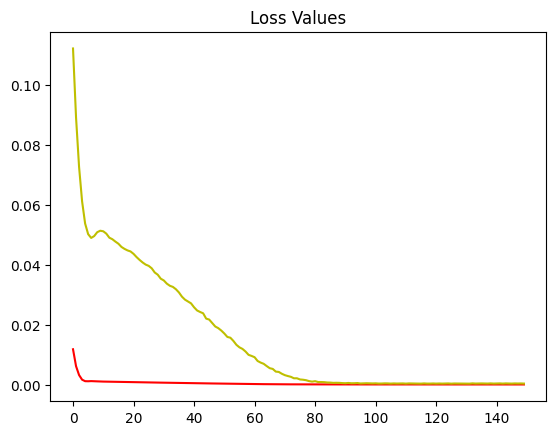

In [61]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs,loss, 'r', label= "Training Loss")
plt.plot(epochs, val_loss, 'y', label= "Validation Loss")
plt.title('Loss Values')

plt.show()

In [62]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 7ms/step


((203, 1), (131, 1))

In [63]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest= scaler.inverse_transform(y_test.reshape(-1,1))


In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#TRAINING

print("Train Data RMSE: ",math.sqrt(mean_squared_error(original_ytrain, train_predict)))
print("Train Data MSE: ", mean_squared_error(original_ytrain, train_predict))
print("Train Data MAE: ", mean_absolute_error(original_ytrain, train_predict))

#TEST

print("Test Data RMSE: ",math.sqrt(mean_squared_error(original_ytest, test_predict)))
print("Test Data MSE: " ,mean_squared_error(original_ytest, test_predict))
print("Test Data MAE: " ,mean_absolute_error(original_ytest, test_predict))


Train Data RMSE:  377.3549467628784
Train Data MSE:  142396.75584641477
Train Data MAE:  243.54267048552958
Test Data RMSE:  719.7836108173101
Test Data MSE:  518088.446401205
Test Data MAE:  463.8572802371183


RESULT:

ACCORDING TO THE RESULTS BOTH FROM LSTM AND GRU TRAININGS, WHEN WE COMPARE THE METRICS OF THEM WITH EACH OTHER, WE CAN CONCLUDE THAT GRU PERFORMED BETTER. GRU INDICATES THAT MODEL PERFORMS BETTER IN TERMS OF ACCURACY AND PREDICTION ERROR BOTH IN THE TRAINING AND TEST DATASETS.